In [2]:
from pylab import *
import seaborn as sns
import pandas as pd

In [3]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize']=(12,8.5)
#plt.rcParams['figure.titlesize'] = 18
plt.rcParams['axes.labelsize'] = 26
plt.rcParams['axes.linewidth'] = 2.3
plt.rcParams['xtick.labelsize'] = 20

In [4]:

cesio_137 =  pd.read_csv('./ARD_2808_papel_null_100_histo.txt', sep= '\t', header=None, names=['charge','count'], nrows= 701)
#cesio_137_05 = pd.read_csv('./ARD_2308_16_0p5mm_histo.txt', sep= '\t', header=None, names=['charge','count'], nrows= 701)
#cesio_137_cb_1 = pd.read_csv('./ARD_2808_papel_1mm_100_histo.txt', sep= '\t', header=None, names=['charge','count'], nrows= 701)
cesio_137_cb_2 = pd.read_csv('./ARD_2808_papel_2mm_100_histo.txt', sep= '\t', header=None, names=['charge','count'], nrows= 701)
#cesio_137_3 = pd.read_csv('./ARD_2308_16_3mm_histo.txt', sep= '\t', header=None, names=['charge','count'], nrows= 701)
cesio_137_Al_05 = pd.read_csv('./ARD_2808_alum_0p5mm_100_histo.txt', sep= '\t', header=None, names=['charge','count'], nrows= 701)
cesio_137_Al_1 = pd.read_csv('./ARD_2808_alum_1mm_100_histo.txt', sep= '\t', header=None, names=['charge','count'], nrows= 701)

FileNotFoundError: [Errno 2] No such file or directory: './ARD_2808_papel_2mm_100_histo.txt'

In [5]:
cesio_137

,charge,count
0,-500.500,1.0
1,499.500,383.0
2,1499.500,154.0
3,2499.500,49.0
4,3499.500,7.0
...,...,...
696,695499.512,0.0
697,696499.512,0.0
698,697499.512,0.0
699,698499.512,0.0


In [17]:
bario_133 =  pd.read_csv('./ARD_0409_bario133_histo.txt', sep= '\t', header=None, names=['charge','count'], nrows= 258)

<Axes: xlabel='charge', ylabel='count'>

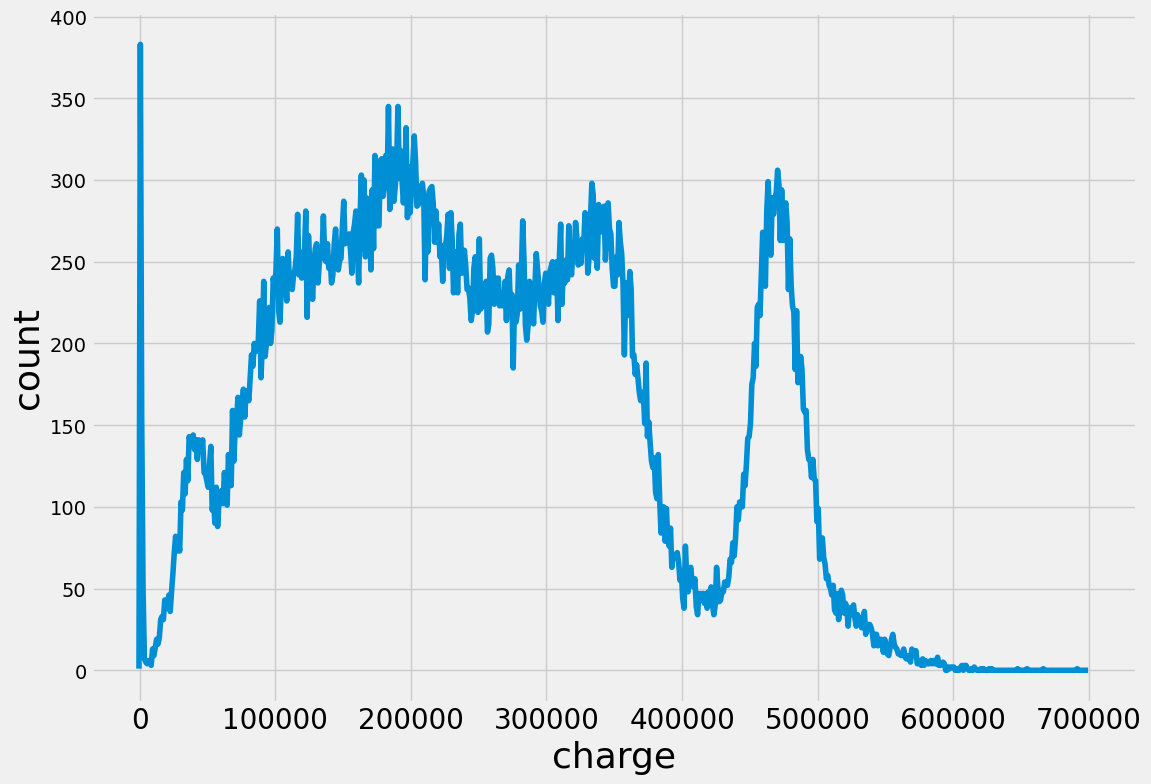

In [7]:
sns.lineplot(data=cesio_137, x= 'charge', y='count')

In [9]:
bario_133

,charge,count
0,-1980.500,1.0
1,-980.500,1.0
2,19.500,9.0
3,1019.500,5.0
4,2019.500,3.0
...,...,...
253,251019.504,1.0
254,252019.504,2.0
255,253019.504,0.0
256,254019.504,0.0


<Axes: xlabel='charge', ylabel='count'>

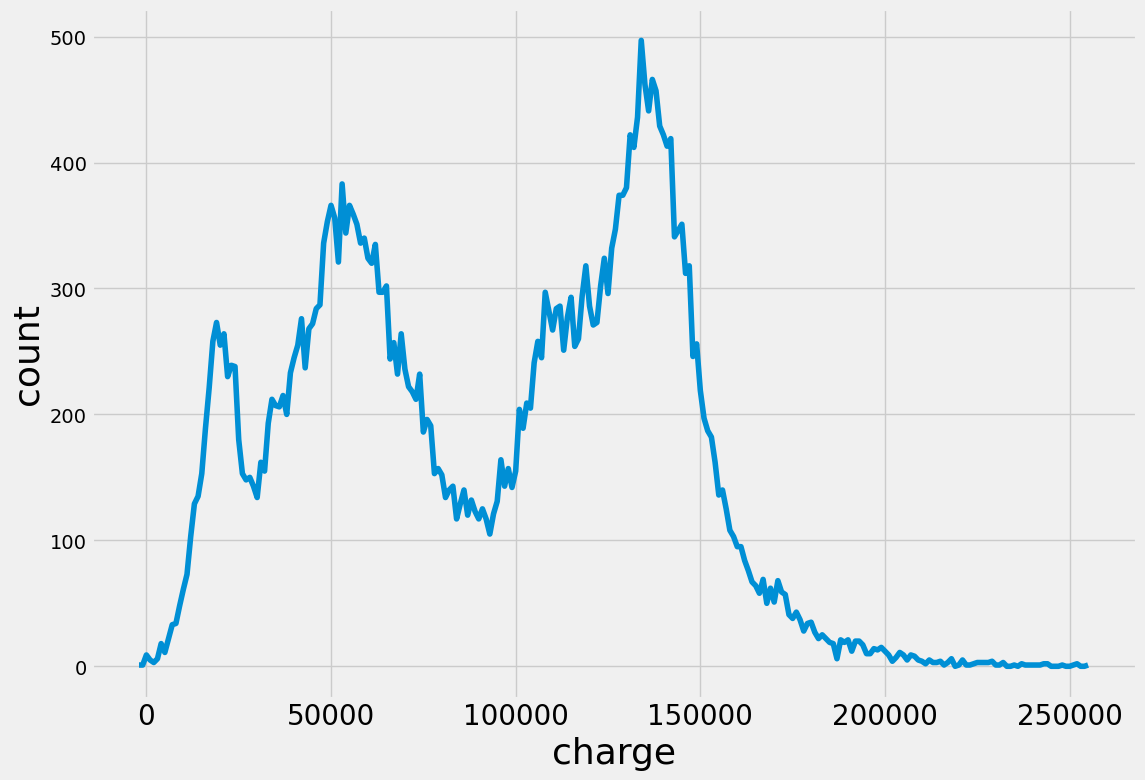

In [18]:
sns.lineplot(data=bario_133, x= 'charge', y='count')

<Axes: xlabel='charge', ylabel='count'>

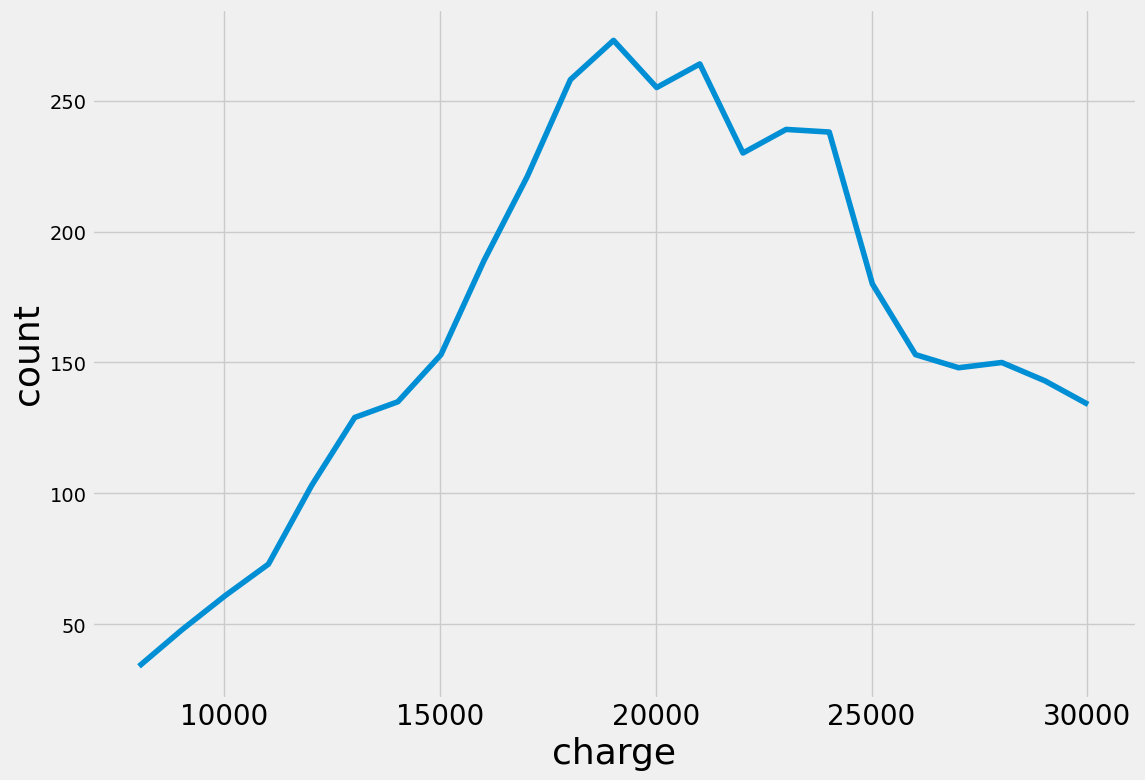

In [95]:
peak1_ba = bario_133[10:33].reset_index(drop= True)
sns.lineplot(data=peak1_ba, x= 'charge', y='count')

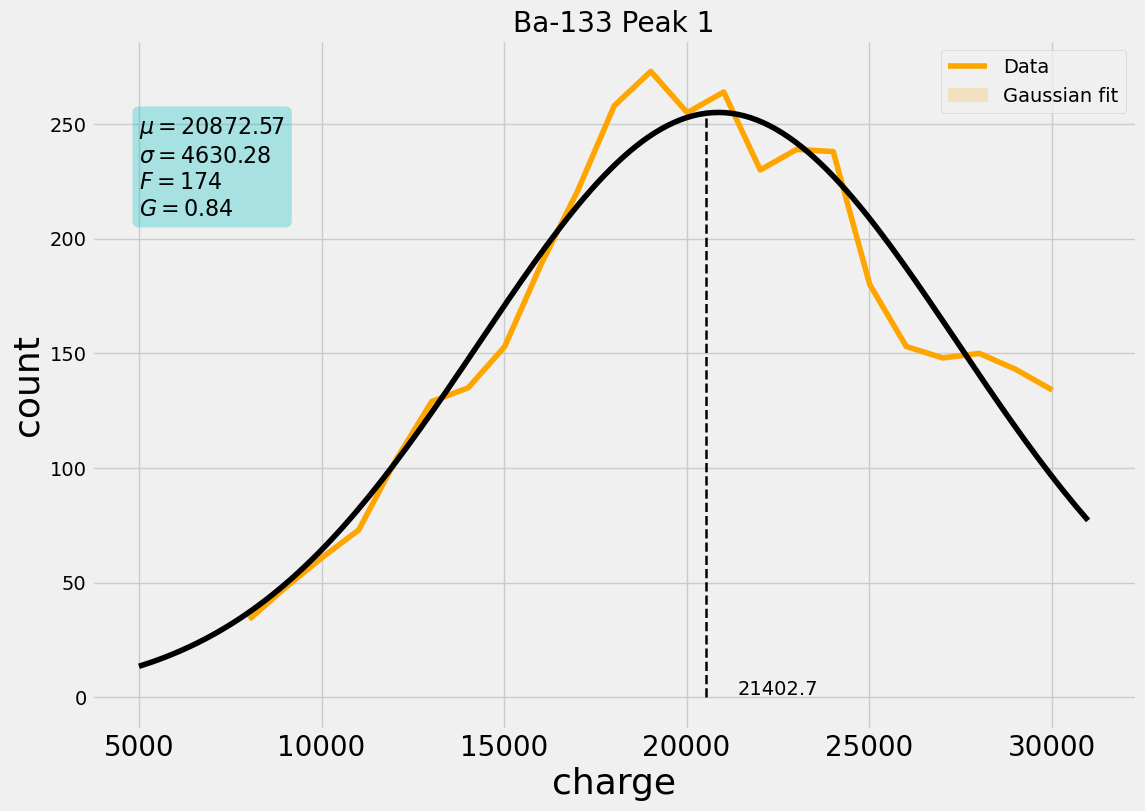

In [148]:
popt, pcov, pdict, pmssg, pflag = curve_fit(gaussian,peak1_ba.charge,peak1_ba['count'],
                       p0= [273,19019.5,1000], full_output=True)

x_ba_1 = np.linspace(5000,31000,150)
gaussian_approx_ba_1 = gaussian(x_ba_1,*popt)

h = max(gaussian_approx_ba_1)
mask = abs(gaussian_approx_ba_1-h) < 1
edges = x_ba_1[mask]
mu_ba_1 = popt[1]
sigma_ba_1 = popt[2]

sns.lineplot(x= peak1_ba['charge'], y=peak1_ba['count'], color='orange')
sns.lineplot(x= x_ba_1, y=gaussian_approx_ba_1, color='black')
#plt.hlines(max(gaussian_approx_ba_1)/2,edges[0],edges[1], linestyles='--',color='y', lw=1.8)
#plt.vlines(edges[0],0,h,linestyles='--', color='g', lw=1.8)
#plt.vlines(edges[1],0,h,linestyles='--', color='g', lw=1.8) 

plt.annotate(str(round(edge,1)), (edge, 1))
    
plt.vlines(edges[1] ,0, h, linestyles='--', lw=1.8, color='black')

textstr = '\n'.join((
    r'$\mu=%.2f$' % (mu_ba_1, ),
    r'$\sigma=%.2f$' % (sigma_ba_1, ),
    r'$F=%.0f$' % (round(edges[1]-edges[0]), ),
    r'$G=%.2f$' % (100*(edges[1]-edges[0])/mu_ba_1, )))

props = dict(boxstyle='round', facecolor='c', alpha=0.3)
plt.text(5000,210,textstr, bbox=props, fontsize=16) 
plt.legend(['Data','Gaussian fit'])
plt.title('Ba-133 Peak 1');
plt.savefig('./Ba-133_peak1.jpg', bbox_inches='tight');

<Axes: xlabel='charge', ylabel='count'>

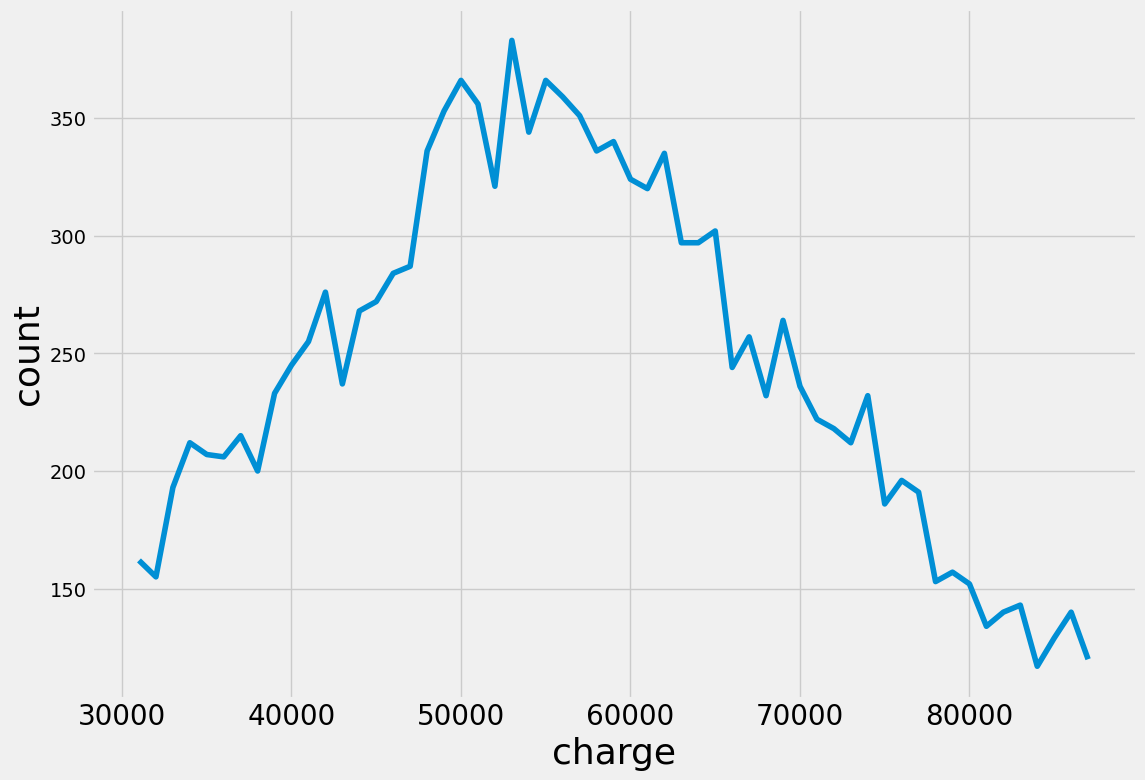

In [97]:
peak2_ba = bario_133[33:90].reset_index(drop= True)
sns.lineplot(data=peak2_ba, x= 'charge', y='count')

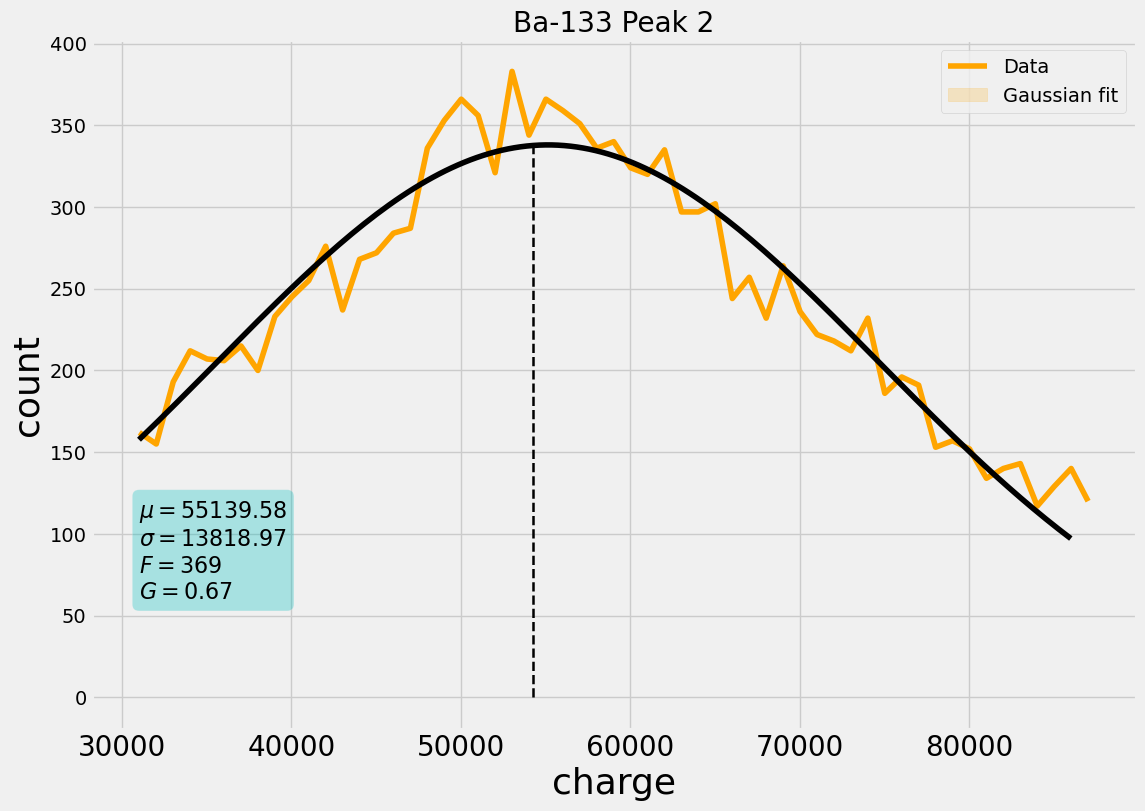

In [151]:
popt, pcov, pdict, pmssg, pflag = curve_fit(gaussian,peak2_ba.charge,peak2_ba['count'],
                       p0= [383,53019.501,1000], full_output=True)

x_ba_2 = np.linspace(31000,86000,150)
gaussian_approx_ba_2 = gaussian(x_ba_2,*popt)

h = max(gaussian_approx_ba_2)
mask = abs(gaussian_approx_ba_2-h) < 1
edges = x_ba_2[mask]
mu_ba_2 = popt[1]
sigma_ba_2 = popt[2]

sns.lineplot(x= peak2_ba['charge'], y=peak2_ba['count'], color='orange')
sns.lineplot(x= x_ba_2, y=gaussian_approx_ba_2, color='black')
#plt.hlines(max(gaussian_approx_ba_1)/2,edges[0],edges[1], linestyles='--',color='y', lw=1.8)
#plt.vlines(edges[0],0,h,linestyles='--', color='g', lw=1.8)
#plt.vlines(edges[1],0,h,linestyles='--', color='g', lw=1.8) 

plt.annotate(str(round(edge, 1)), (edge, 1))
    
plt.vlines(edges[1] ,0, h, linestyles='--', lw=1.8, color='black')

textstr = '\n'.join((
    r'$\mu=%.2f$' % (mu_ba_2, ),
    r'$\sigma=%.2f$' % (sigma_ba_2, ),
    r'$F=%.0f$' % (round(edges[1]-edges[0]), ),
    r'$G=%.2f$' % (100*(edges[1]-edges[0])/mu_ba_2, )))

props = dict(boxstyle='round', facecolor='c', alpha=0.3)
plt.text(31000,60,textstr, bbox=props, fontsize=16) 
plt.legend(['Data','Gaussian fit'])
plt.title('Ba-133 Peak 2');
plt.savefig('./Ba-133_peak2.jpg', bbox_inches='tight');

<Axes: xlabel='charge', ylabel='count'>

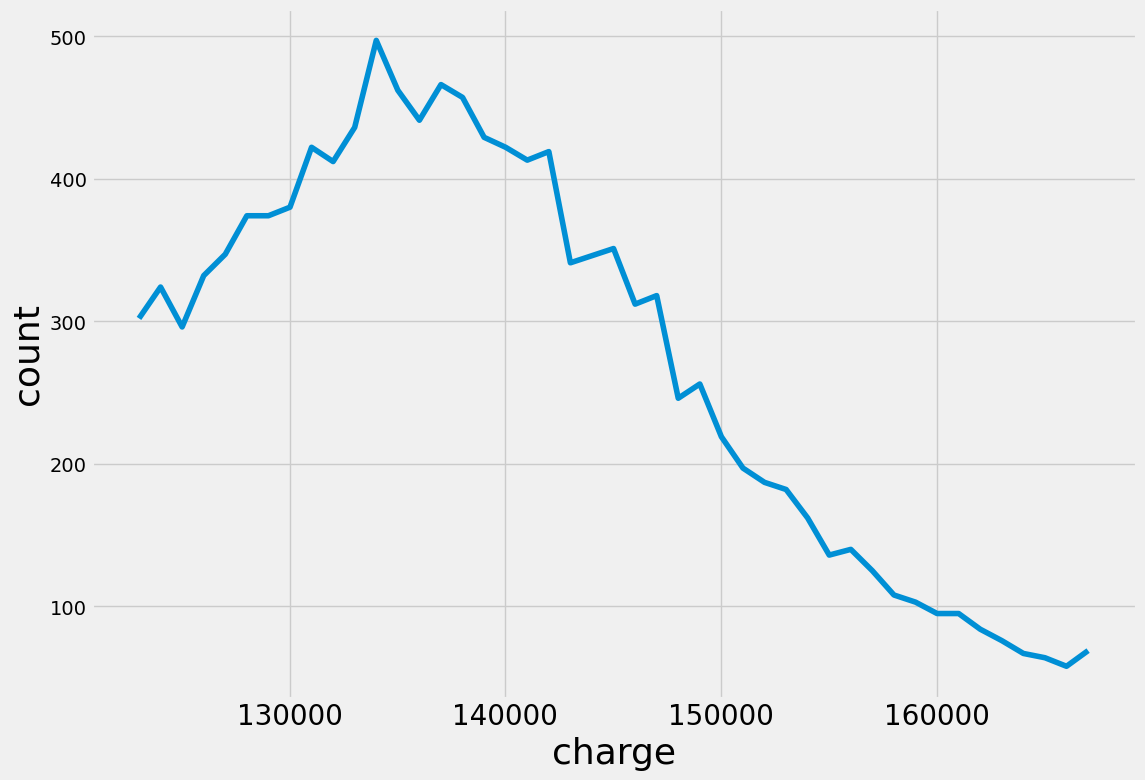

In [129]:
peak3_ba = bario_133[125:170].reset_index(drop= True)
sns.lineplot(data=peak3_ba, x= 'charge', y='count')

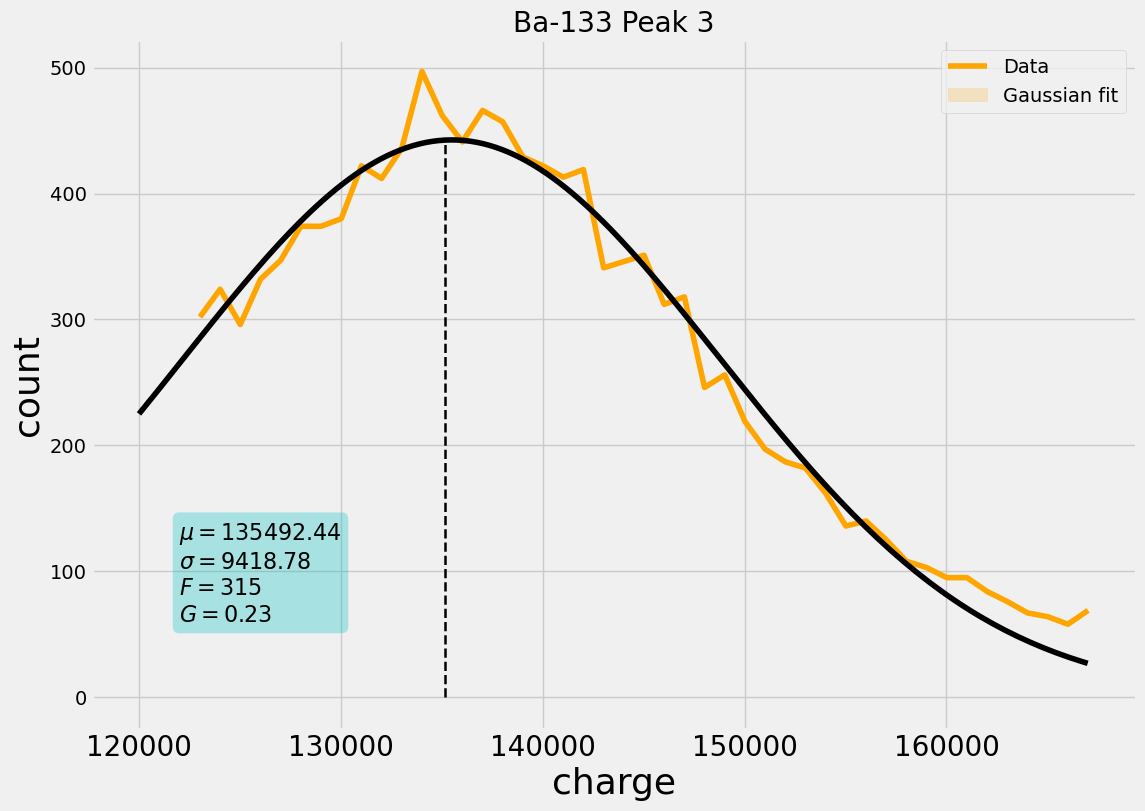

In [150]:
popt, pcov, pdict, pmssg, pflag = curve_fit(gaussian,peak3_ba.charge,peak3_ba['count'],
                       p0= [497,134019.501,1000], full_output=True)

x_ba_3 = np.linspace(120000,167000,150)
gaussian_approx_ba_3 = gaussian(x_ba_3,*popt)

h = max(gaussian_approx_ba_3)
mask = abs(gaussian_approx_ba_3-h) < 1
edges = x_ba_3[mask]
mu_ba_3 = popt[1]
sigma_ba_3 = popt[2]

sns.lineplot(x= peak3_ba['charge'], y=peak3_ba['count'], color='orange')
sns.lineplot(x= x_ba_3, y=gaussian_approx_ba_3, color='black')
#plt.hlines(max(gaussian_approx_ba_1)/2,edges[0],edges[1], linestyles='--',color='y', lw=1.8)
#plt.vlines(edges[0],0,h,linestyles='--', color='g', lw=1.8)
#plt.vlines(edges[1],0,h,linestyles='--', color='g', lw=1.8) 

plt.annotate(str(round(edge, 1)), (edge, 1))
    
plt.vlines(edges[1] ,0, h, linestyles='--', lw=1.8, color='black')

textstr = '\n'.join((
    r'$\mu=%.2f$' % (mu_ba_3, ),
    r'$\sigma=%.2f$' % (sigma_ba_3, ),
    r'$F=%.0f$' % (round(edges[1]-edges[0]), ),
    r'$G=%.2f$' % (100*(edges[1]-edges[0])/mu_ba_3, )))

props = dict(boxstyle='round', facecolor='c', alpha=0.3)
plt.text(122000,60,textstr, bbox=props, fontsize=16) 
plt.legend(['Data','Gaussian fit'])
plt.title('Ba-133 Peak 3');
plt.savefig('./Ba-133_peak3.jpg', bbox_inches='tight');

<Axes: xlabel='charge', ylabel='count'>

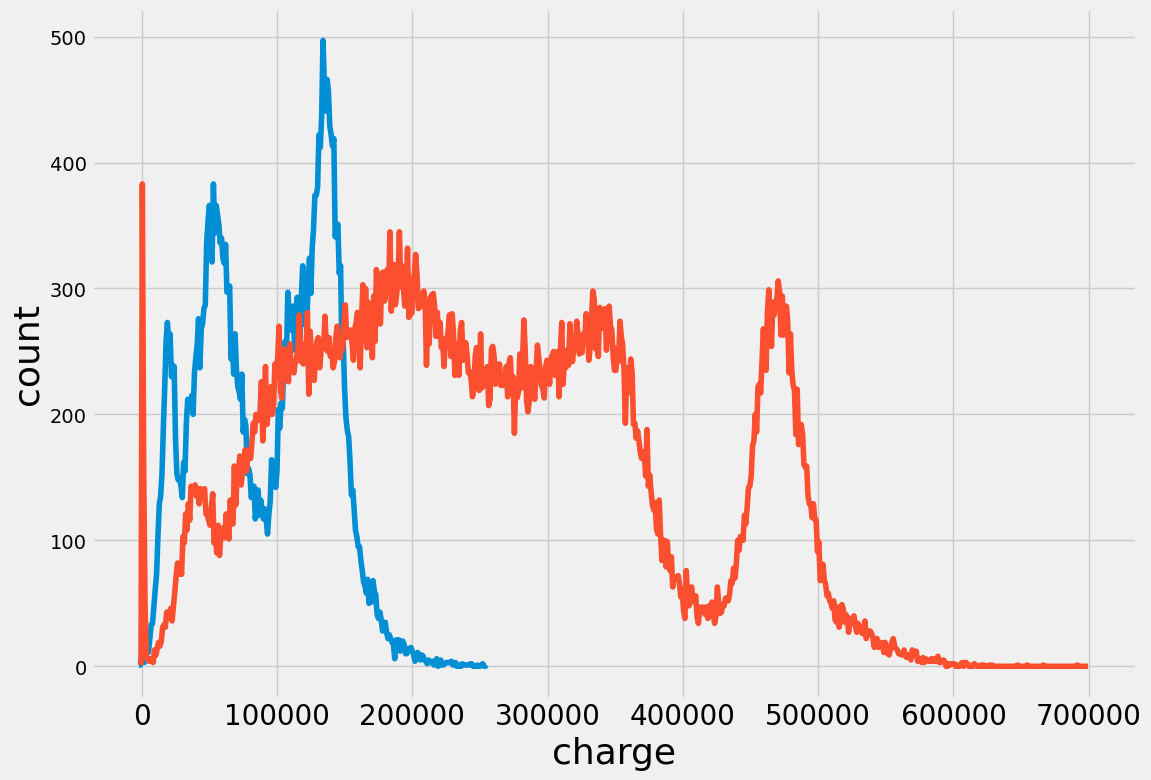

In [15]:
sns.lineplot(data=bario_133, x= 'charge', y='count')
sns.lineplot(data=cesio_137, x= 'charge', y='count')

In [152]:
def traduccion(x):
    return (628*x - 12951977.83)/427229.57 

In [153]:
traduccion(135492.44)

168.84897384326652

In [154]:
traduccion(55139.58)

50.73543577519693

In [155]:
traduccion(20872.57)

0.36513420641740446

In [25]:
from scipy.optimize import curve_fit

def gaussian(x,a,x0,s):
    return a*np.exp(-((x-x0)**2)/(2*s)**2)

<AxesSubplot:xlabel='charge', ylabel='count'>

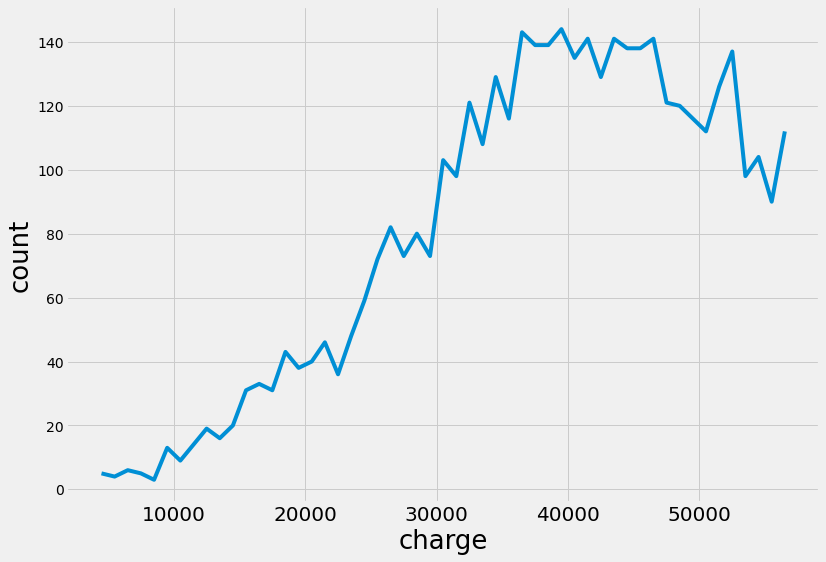

In [5]:
peak1_null = cesio_137[5:58].reset_index(drop= True)
sns.lineplot(data=peak1_null, x= 'charge', y='count')

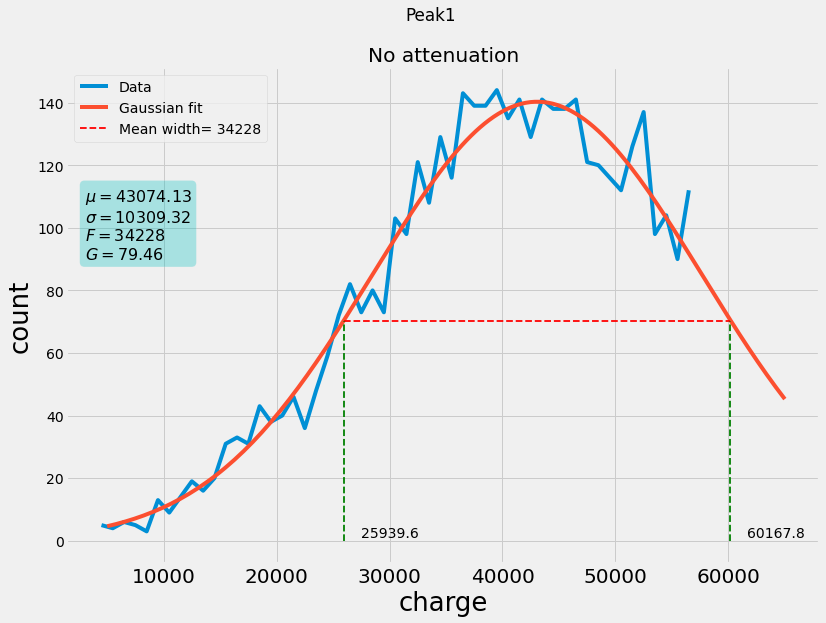

In [6]:
popt, pcov, pdict, pmssg, pflag = curve_fit(gaussian,peak1_null.charge,peak1_null['count'],
                       p0= [160,48800,1000], full_output=True)

x_null_1 = np.linspace(5000,65000,150)
gaussian_approx_null_1 = gaussian(x_null_1,*popt)

h = max(gaussian_approx_null_1)/2
mask = abs(gaussian_approx_null_1-h) < 1
edges = x_null_1[mask]
mu_null = popt[1]
sigma_null = popt[2]

sns.lineplot(x= peak1_null['charge'], y=peak1_null['count']).set(title='No attenuation')
sns.lineplot(x= x_null_1, y=gaussian_approx_null_1)
plt.hlines(max(gaussian_approx_null_1)/2,edges[0],edges[1], linestyles='--',color='r', lw=1.8)
plt.vlines(edges[0],0,h,linestyles='--', color='g', lw=1.8)
plt.vlines(edges[1],0,h,linestyles='--', color='g', lw=1.8) 
for edge in edges:
    plt.annotate(str(round(edge,1)), (edge+1500, 1))

textstr = '\n'.join((
    r'$\mu=%.2f$' % (mu_null, ),
    r'$\sigma=%.2f$' % (sigma_null, ),
    r'$F=%.0f$' % (round(edges[1]-edges[0]), ),
    r'$G=%.2f$' % (100*(edges[1]-edges[0])/mu_null, )))

props = dict(boxstyle='round', facecolor='c', alpha=0.3)
plt.text(3000,90,textstr, bbox=props, fontsize=16) 
plt.legend(['Data','Gaussian fit',f'Mean width= {round(edges[1]-edges[0])}'])
plt.suptitle('Peak1');
plt.savefig('./Peak1_null.jpg', bbox_inches='tight');

<AxesSubplot:xlabel='charge', ylabel='count'>

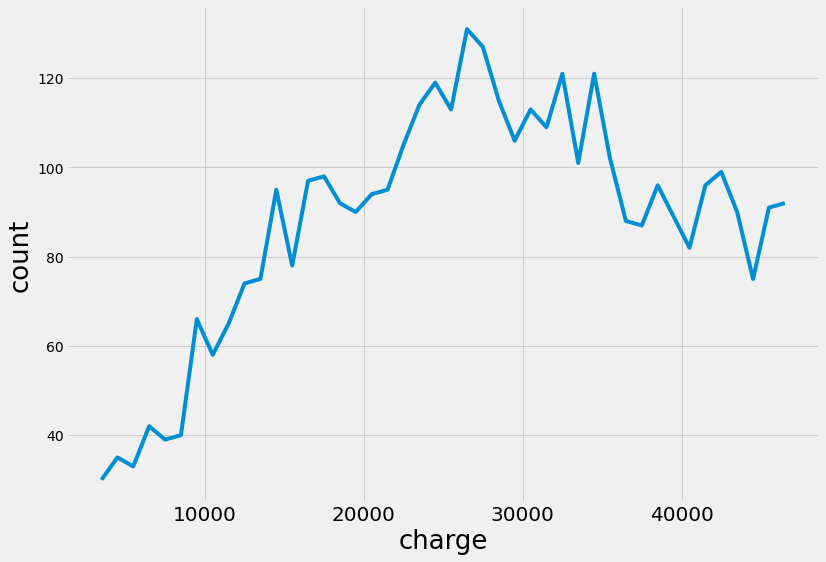

In [7]:
peak1_cb_2 = cesio_137_cb_2[4:48].reset_index(drop= True)
sns.lineplot(data=peak1_cb_2, x= 'charge', y='count')

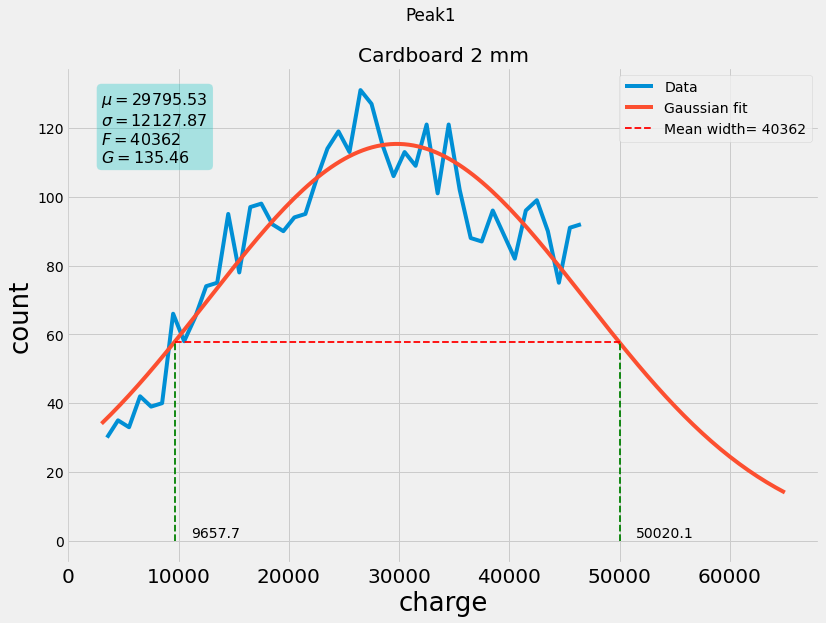

In [8]:
popt, pcov, pdict, pmssg, pflag = curve_fit(gaussian,peak1_cb_2.charge,peak1_cb_2['count'],
                       p0= [160,48800,1000], full_output=True)

x1_cb_2 = np.linspace(3000,65000,150)
gaussian_approx_cb1_2 = gaussian(x1_cb_2,*popt)

h = max(gaussian_approx_cb1_2)/2
mask = abs(gaussian_approx_cb1_2-h) < 0.8
edges = x1_cb_2[mask]
mu_p1_cb_2 = popt[1]
sigma_p1_cb_2 = popt[2]

sns.lineplot(x= peak1_cb_2['charge'], y=peak1_cb_2['count']).set(title='Cardboard 2 mm')
sns.lineplot(x= x1_cb_2, y=gaussian_approx_cb1_2)
plt.hlines(max(gaussian_approx_cb1_2)/2,edges[0],edges[1], linestyles='--',color='r', lw=1.8)
plt.vlines(edges[0],0,h,linestyles='--', color='g', lw=1.8)
plt.vlines(edges[1],0,h,linestyles='--', color='g', lw=1.8) 
for edge in edges:
    plt.annotate(str(round(edge,1)), (edge+1500, 1))
    
textstr = '\n'.join((
    r'$\mu=%.2f$' % (mu_p1_cb_2, ),
    r'$\sigma=%.2f$' % (sigma_p1_cb_2, ),
    r'$F=%.0f$' % (round(edges[1]-edges[0]), ),
    r'$G=%.2f$' % (100*(edges[1]-edges[0])/mu_p1_cb_2, )))

props = dict(boxstyle='round', facecolor='c', alpha=0.3)
plt.text(3000,110,textstr, bbox=props, fontsize=16)    
plt.legend(['Data','Gaussian fit',f'Mean width= {round(edges[1]-edges[0])}'])
plt.suptitle('Peak1')
plt.savefig('./Peak1_cb_2.jpg', bbox_inches='tight');

<AxesSubplot:xlabel='charge', ylabel='count'>

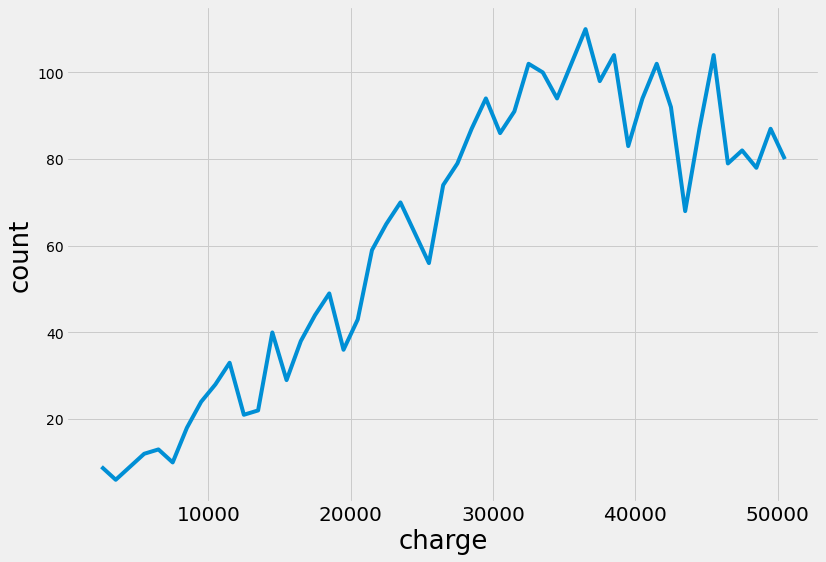

In [9]:
peak1_al_1 = cesio_137_Al_1[3:52].reset_index(drop= True)
sns.lineplot(data=peak1_al_1, x= 'charge', y='count')

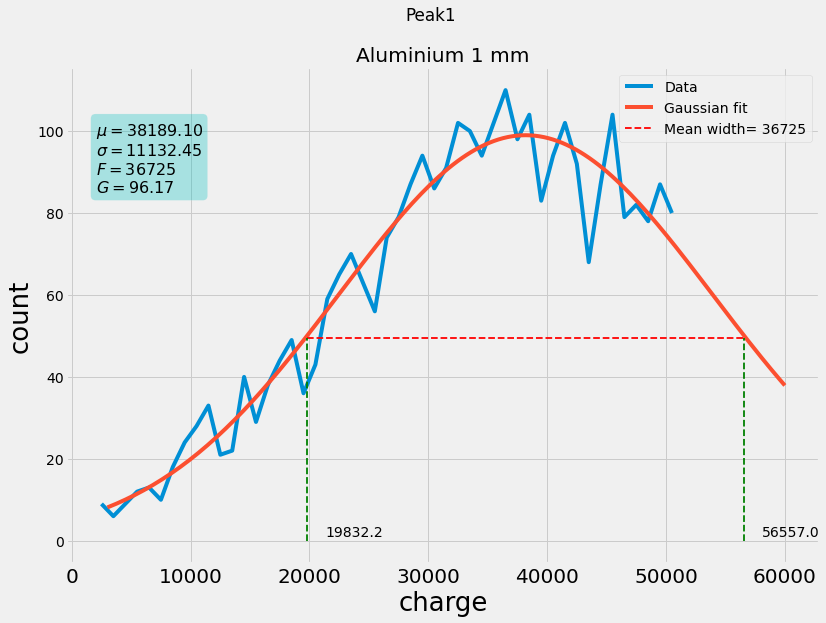

In [10]:
popt, pcov, pdict, pmssg, pflag = curve_fit(gaussian,peak1_al_1.charge,peak1_al_1['count'],
                       p0= [160,40800,1000], full_output=True)

x1_al_1 = np.linspace(3000,60000,150)
gaussian_approx_al1_1 = gaussian(x1_al_1,*popt)

h = max(gaussian_approx_al1_1)/2
mask = abs(gaussian_approx_al1_1-h) < 0.7
edges = x1_al_1[mask]
mu_p1_al_1 = popt[1]
sigma_p1_al_1 = popt[2]

sns.lineplot(x= peak1_al_1['charge'], y=peak1_al_1['count']).set(title='Aluminium 1 mm')
sns.lineplot(x= x1_al_1, y=gaussian_approx_al1_1)
plt.hlines(max(gaussian_approx_al1_1)/2,edges[0],edges[1], linestyles='--',color='r', lw=1.8)
plt.vlines(edges[0],0,h,linestyles='--', color='g', lw=1.8)
plt.vlines(edges[1],0,h,linestyles='--', color='g', lw=1.8) 
for edge in edges:
    plt.annotate(str(round(edge,1)), (edge+1500, 1))
    
textstr = '\n'.join((
    r'$\mu=%.2f$' % (mu_p1_al_1, ),
    r'$\sigma=%.2f$' % (sigma_p1_al_1, ),
    r'$F=%.0f$' % (round(edges[1]-edges[0]), ),
    r'$G=%.2f$' % (100*(edges[1]-edges[0])/mu_p1_al_1, )))

props = dict(boxstyle='round', facecolor='c', alpha=0.3)
plt.text(2000,85,textstr, bbox=props, fontsize=16)    

plt.legend(['Data','Gaussian fit',f'Mean width= {round(edges[1]-edges[0])}'])
plt.suptitle('Peak1')
plt.savefig('./Peak1_al_1.jpg', bbox_inches='tight');

<AxesSubplot:xlabel='charge', ylabel='count'>

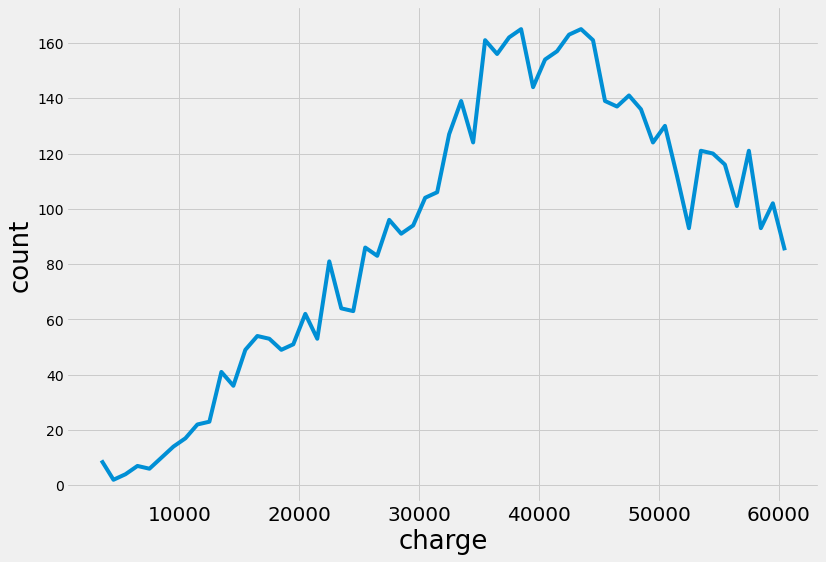

In [12]:
peak1_al_05 = cesio_137_Al_05[4:62].reset_index(drop= True)
sns.lineplot(data=peak1_al_05, x= 'charge', y='count')

In [ ]:
mask = abs(gaussian_approx_al1_05-h) < 1.2
gaussian_approx_al1_05[mask]

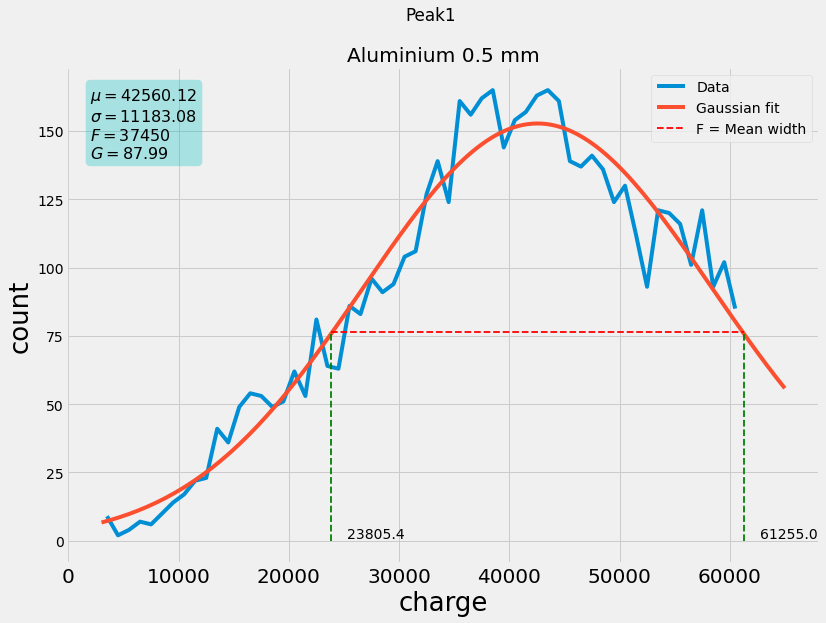

In [13]:
popt, pcov, pdict, pmssg, pflag = curve_fit(gaussian,peak1_al_05.charge,peak1_al_05['count'],
                       p0= [160,40800,1000], full_output=True)

x1_al_05 = np.linspace(3000,65000,150)
gaussian_approx_al1_05 = gaussian(x1_al_05,*popt)

h = max(gaussian_approx_al1_05)/2
mask = abs(gaussian_approx_al1_05-h) < 1.2
edges = x1_al_05[mask]
mu_p1_al_05 = popt[1]
sigma_p1_al_05 = popt[2]

sns.lineplot(x= peak1_al_05['charge'], y=peak1_al_05['count']).set(title='Aluminium 0.5 mm')
sns.lineplot(x= x1_al_05, y=gaussian_approx_al1_05)
plt.hlines(max(gaussian_approx_al1_05)/2,edges[0],edges[1], linestyles='--',color='r', lw=1.8)
plt.vlines(edges[0],0,h,linestyles='--', color='g', lw=1.8)
plt.vlines(edges[1],0,h,linestyles='--', color='g', lw=1.8) 
for edge in edges:
    plt.annotate(str(round(edge,1)), (edge+1500, 1))
    
textstr = '\n'.join((
    r'$\mu=%.2f$' % (mu_p1_al_05, ),
    r'$\sigma=%.2f$' % (sigma_p1_al_05, ),
    r'$F=%.0f$' % (round(edges[1]-edges[0]), ),
    r'$G=%.2f$' % (100*(edges[1]-edges[0])/mu_p1_al_05, )))

props = dict(boxstyle='round', facecolor='c', alpha=0.3)
plt.text(2000,140,textstr, bbox=props, fontsize=16)

plt.legend(['Data','Gaussian fit','F = Mean width'])
plt.suptitle('Peak1')
plt.savefig('./Peak1_al_05.jpg', bbox_inches='tight');

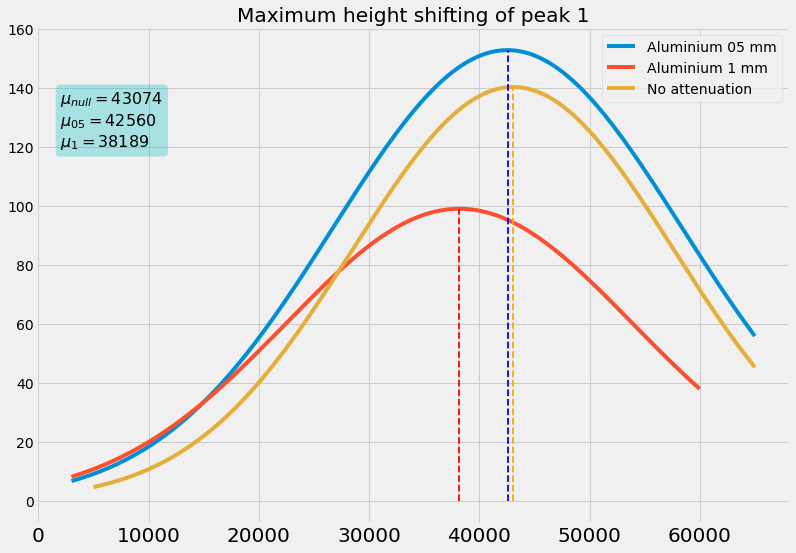

In [49]:
mus = [mu_null,mu_p1_al_05,mu_p1_al_1]
gaussians = [gaussian_approx_null_1,gaussian_approx_al1_05,gaussian_approx_al1_1]
colors = ['orange','b','r']
sns.lineplot(x= x1_al_05, y=gaussian_approx_al1_05, label='Aluminium 05 mm')
sns.lineplot(x= x1_al_1, y=gaussian_approx_al1_1, label='Aluminium 1 mm')
sns.lineplot(x= x_null_1, y=gaussian_approx_null_1, label='No attenuation')

for mu,gaussian,color in zip(mus,gaussians,colors):
    plt.vlines(mu,0,max(gaussian), linestyles='--', lw=1.8, color=color)
    
    
textstr = '\n'.join((
    r'$\mu_{null}=%.0f$' % (mus[0], ),
    r'$\mu_{05}=%.0f$' % (mus[1], ),
    r'$\mu_{1}=%.0f$' % (mus[2], )))

props = dict(boxstyle='round', facecolor='c', alpha=0.3)
plt.text(2000,120,textstr, bbox=props, fontsize=16)

plt.title('Maximum height shifting of peak 1')
plt.legend()
plt.savefig('./Peak1_al_shifting.jpg', bbox_inches='tight');

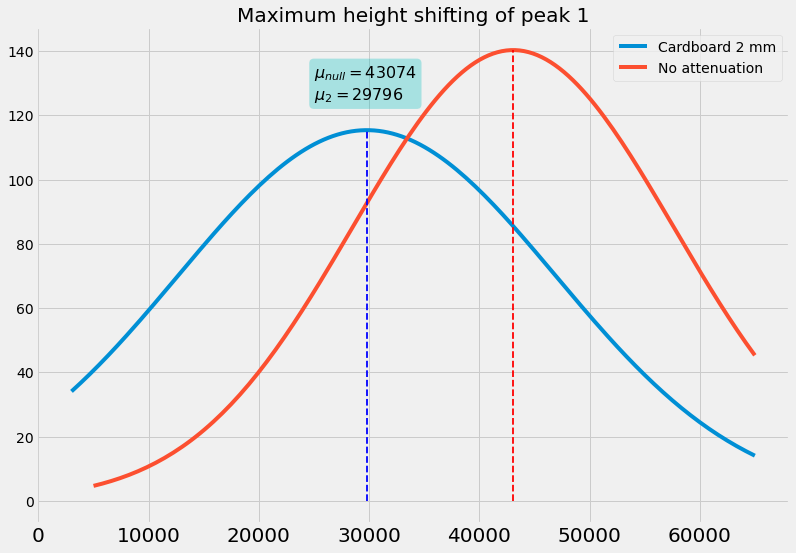

In [53]:
mus = [mu_null,mu_p1_cb_2]
gaussians = [gaussian_approx_null_1, gaussian_approx_cb1_2]
colors = ['r','b']
h_max = [round(max(h)) for h in [gaussian_approx_null_1,gaussian_approx_cb1_2]]
sns.lineplot(x= x1_cb_2, y=gaussian_approx_cb1_2, label='Cardboard 2 mm')
sns.lineplot(x= x_null_1, y=gaussian_approx_null_1, label='No attenuation')

for mu,gaussian,color in zip(mus,gaussians,colors):
    plt.vlines(mu,0,max(gaussian), linestyles='--', lw=1.8, color=color)

    
textstr = '\n'.join((
    r'$\mu_{null}=%.0f$' % (mus[0], ),
    r'$\mu_{2}=%.0f$' % (mus[1], ),
    r'$\Count_{null}=%.0f$' % (h_max[1], ),
    r'$\Count_{2}=%.0f$' % (h_max[1], )
    ))

props = dict(boxstyle='round', facecolor='c', alpha=0.3)
plt.text(2500,125,textstr, bbox=props, fontsize=16)

plt.title('Maximum height shifting of peak 1')
plt.legend()
plt.savefig('./Peak1_cb_shifting.jpg', bbox_inches='tight');

<AxesSubplot:xlabel='charge', ylabel='count'>

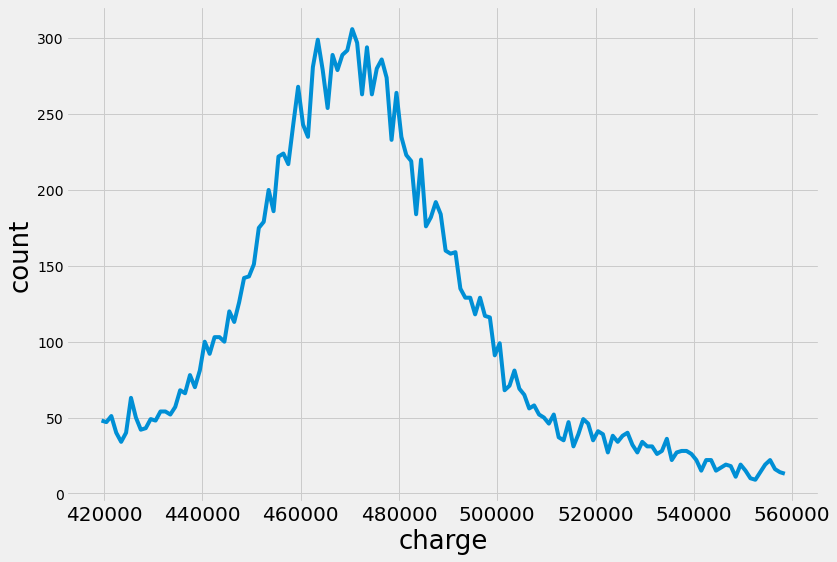

In [4]:
peak2_null = cesio_137[420:560].reset_index(drop= True)
sns.lineplot(data=peak2_null, x= 'charge', y='count')

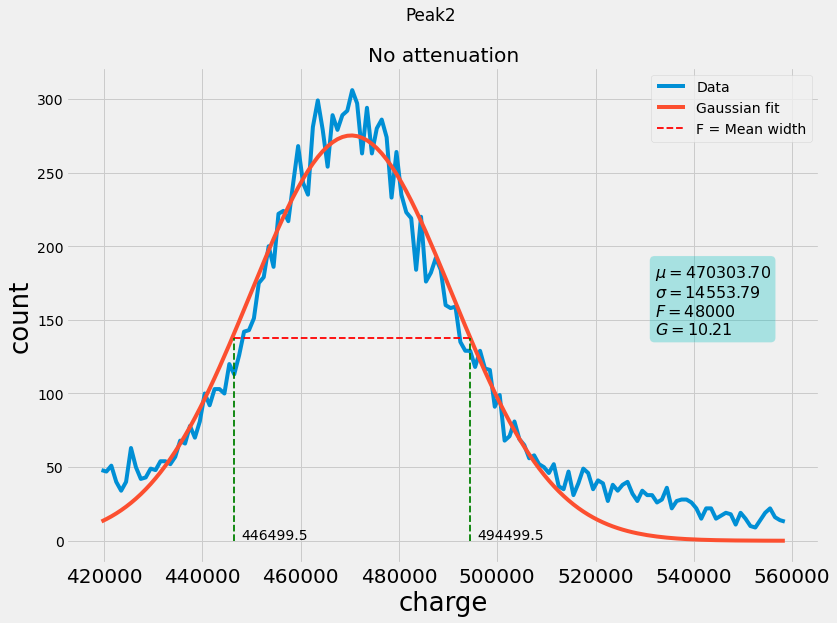

In [16]:
popt, pcov, pdict, pmssg, pflag = curve_fit(gaussian,peak2_null.charge,peak2_null['count'],
                       p0= [160,488000,10000], full_output=True)

x_null = peak2_null.charge
gaussian_approx_null = gaussian(x_null,*popt)

h = max(gaussian_approx_null)/2
edges = peak2_null.charge[gaussian_approx_null[abs(gaussian_approx_null-h) < 4].index.to_list()].reset_index(drop=True)
mu_null = popt[1]
sigma_null = popt[2]

sns.lineplot(x= peak2_null['charge'], y=peak2_null['count']).set(title='No attenuation')
sns.lineplot(x= x_null, y=gaussian_approx_null)
plt.hlines(h,edges[0],edges[1], linestyles='--',color='r', lw=1.8)
plt.vlines(edges[0],0,h,linestyles='--', color='g', lw=1.8)
plt.vlines(edges[1],0,h,linestyles='--', color='g', lw=1.8) 
for edge in edges:
    plt.annotate(str(round(edge,1)), (edge+1500, 1))

    
textstr = '\n'.join((
    r'$\mu=%.2f$' % (mu_null, ),
    r'$\sigma=%.2f$' % (sigma_null, ),
    r'$F=%.0f$' % (round(edges[1]-edges[0]), ),
    r'$G=%.2f$' % (100*(edges[1]-edges[0])/mu_null, )))

props = dict(boxstyle='round', facecolor='c', alpha=0.3)
plt.text(532000,140,textstr, bbox=props, fontsize=16)

plt.legend(['Data','Gaussian fit','F = Mean width'])

plt.suptitle('Peak2');
plt.savefig('./Peak2_null.jpg', bbox_inches='tight');

<AxesSubplot:xlabel='charge', ylabel='count'>

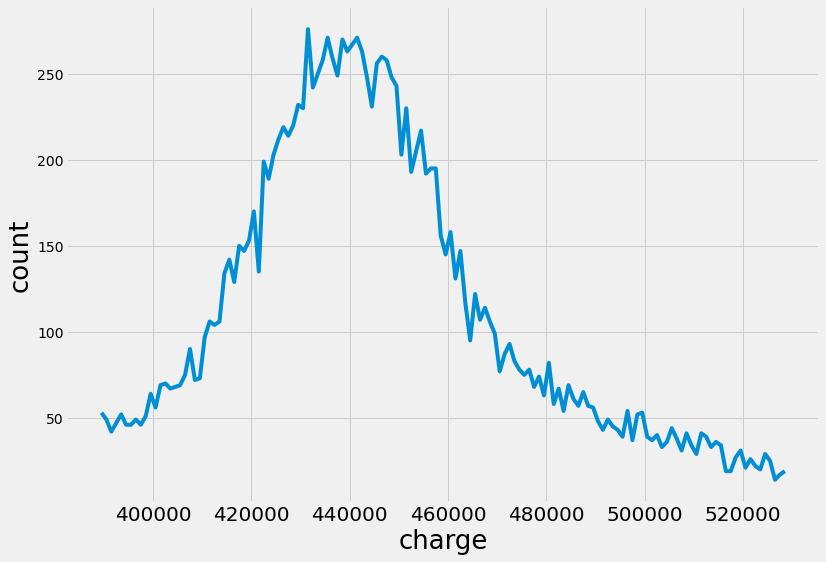

In [12]:
peak2_cb_2 = cesio_137_cb_2[390:530].reset_index(drop= True)
sns.lineplot(data=peak2_cb_2, x= 'charge', y='count')

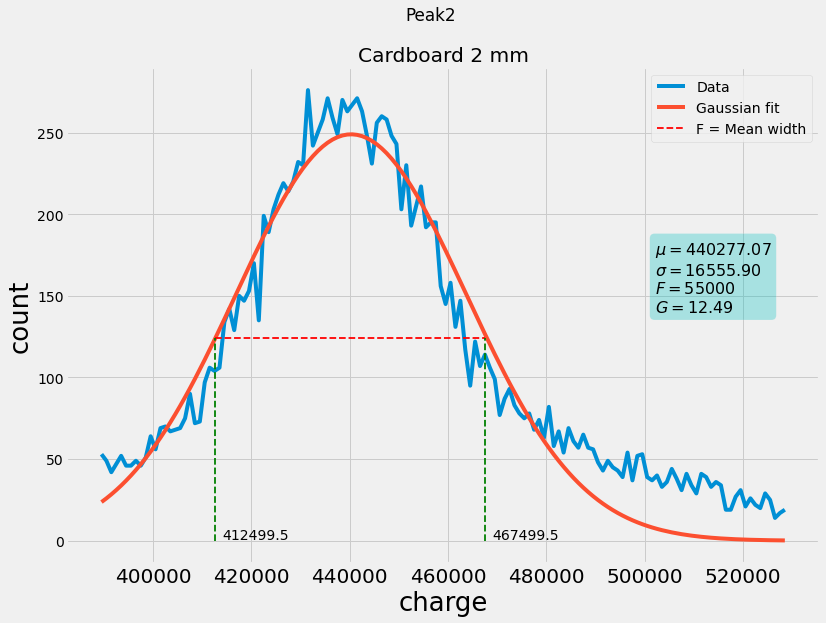

In [17]:
popt, pcov, pdict, pmssg, pflag = curve_fit(gaussian,peak2_cb_2.charge,peak2_cb_2['count'],
                       p0= [160,488000,10000], full_output=True)

x_cb_2 = peak2_cb_2.charge
gaussian_approx_cb_2 = gaussian(x_cb_2,*popt)

h = max(gaussian_approx_cb_2)/2
edges = peak2_cb_2.charge[gaussian_approx_cb_2[abs(gaussian_approx_cb_2-h) < 4].index.to_list()].reset_index(drop=True)
mu_cb_2 = popt[1]
sigma_cb_2 = popt[2]

sns.lineplot(x= peak2_cb_2['charge'], y=peak2_cb_2['count']).set(title='Cardboard 2 mm')
sns.lineplot(x= x_cb_2, y=gaussian_approx_cb_2)
plt.hlines(max(gaussian_approx_cb_2)/2,edges[0],edges[1], linestyles='--',color='r', lw=1.8)
plt.vlines(edges[0],0,h,linestyles='--', color='g', lw=1.8)
plt.vlines(edges[1],0,h,linestyles='--', color='g', lw=1.8) 
for edge in edges:
    plt.annotate(str(round(edge,1)), (edge+1500, 1))

textstr = '\n'.join((
    r'$\mu=%.2f$' % (mu_cb_2, ),
    r'$\sigma=%.2f$' % (sigma_cb_2, ),
    r'$F=%.0f$' % (round(edges[1]-edges[0]), ),
    r'$G=%.2f$' % (100*(edges[1]-edges[0])/mu_cb_2, )))

props = dict(boxstyle='round', facecolor='c', alpha=0.3)
plt.text(502000,140,textstr, bbox=props, fontsize=16)
plt.legend(['Data','Gaussian fit','F = Mean width'])
plt.suptitle('Peak2');
plt.savefig('./Peak2_cb_2mm.jpg', bbox_inches='tight');

<AxesSubplot:xlabel='charge', ylabel='count'>

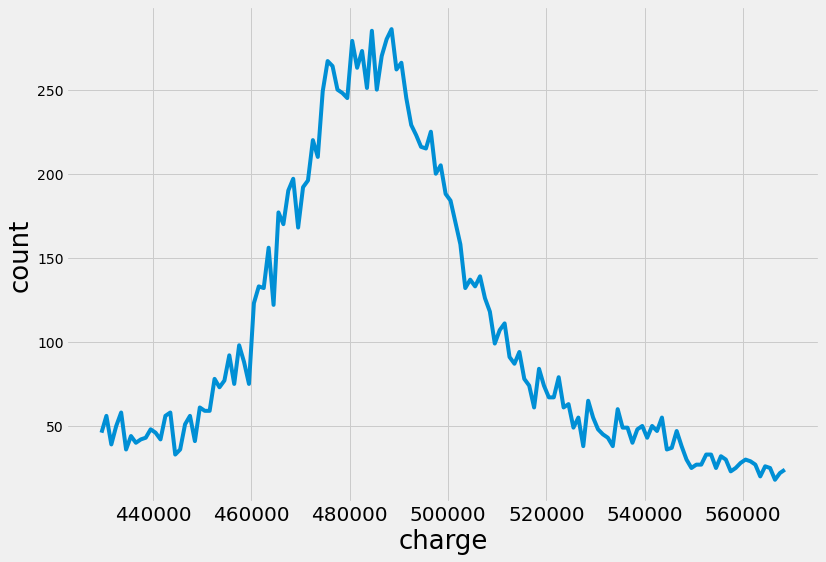

In [5]:
peak2_al_05 = cesio_137_Al_05[430:570].reset_index(drop= True)
sns.lineplot(data=peak2_al_05, x= 'charge', y='count')

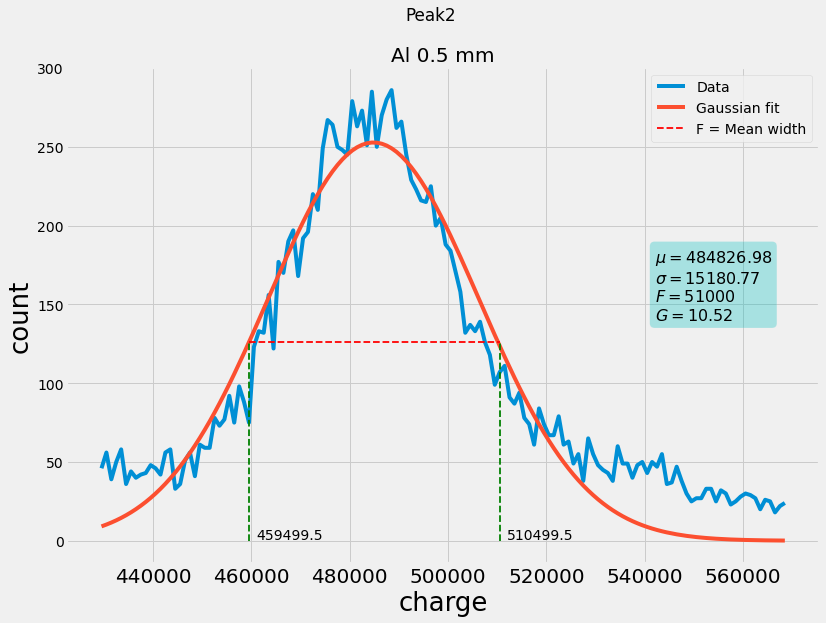

In [6]:
popt, pcov, pdict, pmssg, pflag = curve_fit(gaussian,peak2_al_05.charge,peak2_al_05['count'],
                       p0= [160,488000,10000], full_output=True)

x_al_05 = peak2_al_05.charge
gaussian_approx_al_05 = gaussian(x_al_05,*popt)

h = max(gaussian_approx_al_05)/2
edges = peak2_al_05.charge[gaussian_approx_al_05[abs(gaussian_approx_al_05-h) < 4].index.to_list()].reset_index(drop=True)
mu_al_05 = popt[1]
sigma_al_05 = popt[2]

sns.lineplot(x= peak2_al_05['charge'], y=peak2_al_05['count']).set(title='Al 0.5 mm')
sns.lineplot(x= x_al_05, y=gaussian_approx_al_05)
plt.hlines(h,edges[0],edges[1], linestyles='--',color='r', lw=1.8)
plt.vlines(edges[0],0,h,linestyles='--', color='g', lw=1.8)
plt.vlines(edges[1],0,h,linestyles='--', color='g', lw=1.8) 

for edge in edges:
    plt.annotate(str(round(edge,1)), (edge+1500, 1))

textstr = '\n'.join((
    r'$\mu=%.2f$' % (mu_al_05, ),
    r'$\sigma=%.2f$' % (sigma_al_05, ),
    r'$F=%.0f$' % (round(edges[1]-edges[0]), ),
    r'$G=%.2f$' % (100*(edges[1]-edges[0])/mu_al_05, )))

props = dict(boxstyle='round', facecolor='c', alpha=0.3)
plt.text(542000,140,textstr, bbox=props, fontsize=16)

plt.legend(['Data','Gaussian fit','F = Mean width'])
plt.suptitle('Peak2');
plt.savefig('./Peak2_al_05mm.jpg', bbox_inches='tight');

<AxesSubplot:xlabel='charge', ylabel='count'>

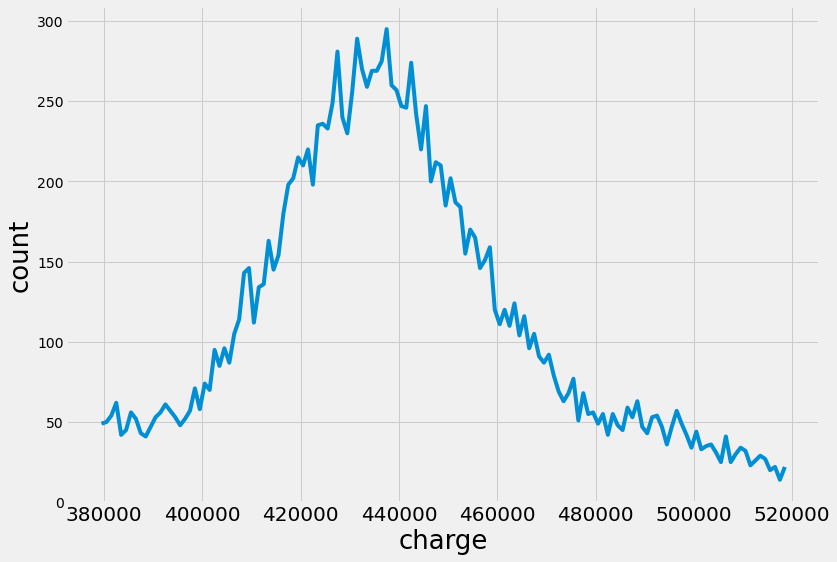

In [21]:
peak2_al_1 = cesio_137_Al_1[380:520].reset_index(drop= True)
sns.lineplot(data=peak2_al_1, x= 'charge', y='count')

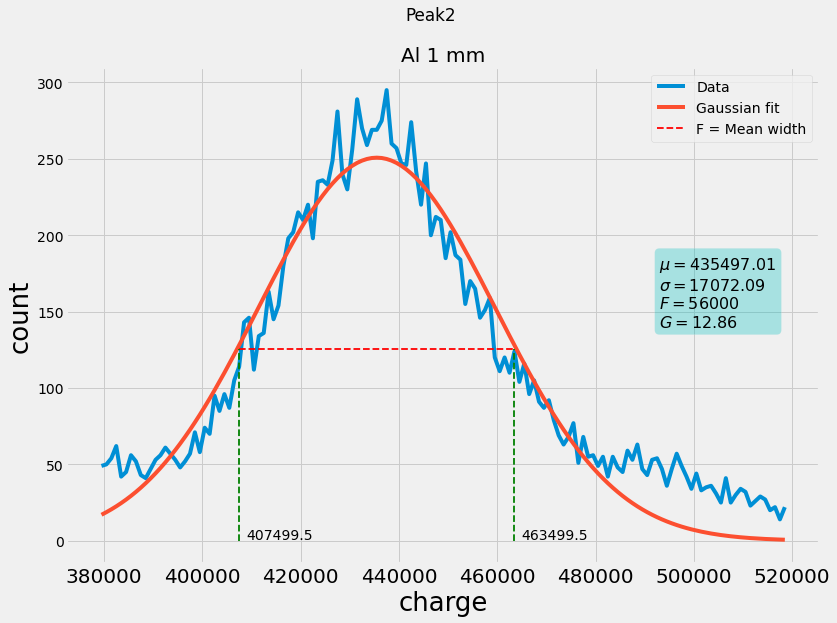

In [25]:
popt, pcov, pdict, pmssg, pflag = curve_fit(gaussian,peak2_al_1.charge,peak2_al_1['count'],
                       p0= [160,488000,10000], full_output=True)

x_al_1 = peak2_al_1.charge
gaussian_approx_al_1 = gaussian(x_al_1,*popt)

h = max(gaussian_approx_al_1)/2
edges = peak2_al_1.charge[gaussian_approx_al_1[abs(gaussian_approx_al_1-h) < 3].index.to_list()].reset_index(drop=True)
mu_al_1 = popt[1]
sigma_al_1 = popt[2]

sns.lineplot(x= peak2_al_1['charge'], y=peak2_al_1['count']).set(title='Al 1 mm')
sns.lineplot(x= x_al_1, y=gaussian_approx_al_1)
plt.hlines(h,edges[0],edges[1], linestyles='--',color='r', lw=1.8)
plt.vlines(edges[0],0,h,linestyles='--', color='g', lw=1.8)
plt.vlines(edges[1],0,h,linestyles='--', color='g', lw=1.8) 
for edge in edges:
    plt.annotate(str(round(edge,1)), (edge+1500, 1))

textstr = '\n'.join((
    r'$\mu=%.2f$' % (mu_al_1, ),
    r'$\sigma=%.2f$' % (sigma_al_1, ),
    r'$F=%.0f$' % (round(edges[1]-edges[0]), ),
    r'$G=%.2f$' % (100*(edges[1]-edges[0])/mu_al_1, )))

props = dict(boxstyle='round', facecolor='c', alpha=0.3)
plt.text(493000,140,textstr, bbox=props, fontsize=16)

plt.legend(['Data','Gaussian fit','F = Mean width'])

plt.suptitle('Peak2');
plt.savefig('./Peak2_al_1mm.jpg', bbox_inches='tight');

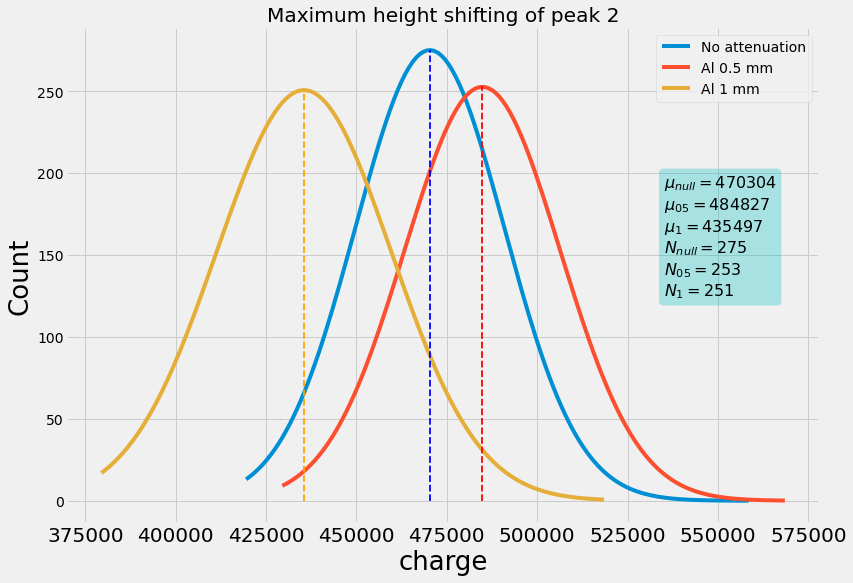

In [34]:
h_max = [round(max(h)) for h in [gaussian_approx_null,gaussian_approx_al_05,gaussian_approx_al_1]]
mus = [round(mu) for mu in [mu_null,mu_al_05,mu_al_1]]
colors = ['b','r','orange']
sns.lineplot(x= x_null, y=gaussian_approx_null,
             label='No attenuation').set(title='Peak2 for different width of Aluminium',
                                        ylabel='Count')
sns.lineplot(x= x_al_05, y=gaussian_approx_al_05, label= 'Al 0.5 mm')
sns.lineplot(x= x_al_1, y=gaussian_approx_al_1, label= 'Al 1 mm')

textstr = '\n'.join((
    r'$\mu_{null}=%.0f$' % (mus[0], ),
    r'$\mu_{05}=%.0f$' % (mus[1], ),
    r'$\mu_{1}=%.0f$' % (mus[2], ),
    r'$N_{null}=%.0f$' % (h_max[0], ),
    r'$N_{05}=%.0f$' % (h_max[1], ),
    r'$N_{1}=%.0f$' % (h_max[2], )
    ))

props = dict(boxstyle='round', facecolor='c', alpha=0.3)
plt.text(535000,125,textstr, bbox=props, fontsize=16)

plt.title('Maximum height shifting of peak 2')


for h,mu,color in zip(h_max,mus,colors):
    plt.vlines(mu,0,h, linestyles='--', colors=color, lw=1.8)
    
plt.savefig('./Peak2_Al_shifting.jpg', bbox_inches='tight');

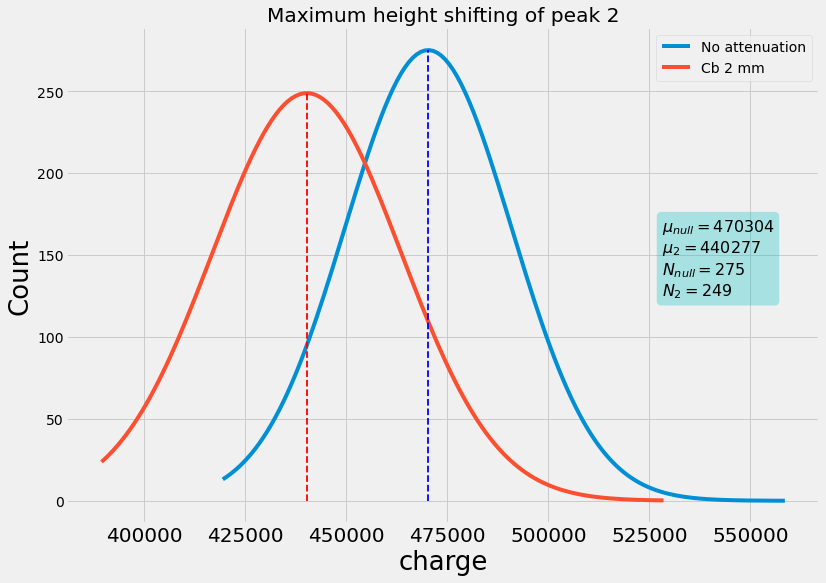

In [42]:
h_max = [round(max(h)) for h in [gaussian_approx_null,gaussian_approx_cb_2]]
mus = [round(mu) for mu in [mu_null,mu_cb_2]]
colors = ['b','r']
sns.lineplot(x= x_null, y=gaussian_approx_null,
             label='No attenuation').set(title='Peak2 for different width of Cardboard',
                                        ylabel='Count')
sns.lineplot(x= x_cb_2, y=gaussian_approx_cb_2, label= 'Cb 2 mm')

textstr = '\n'.join((
    r'$\mu_{null}=%.0f$' % (mus[0], ),
    r'$\mu_{2}=%.0f$' % (mus[1], ),
    r'$N_{null}=%.0f$' % (h_max[0], ),
    r'$N_{2}=%.0f$' % (h_max[1], ),
    ))

props = dict(boxstyle='round', facecolor='c', alpha=0.3)
plt.text(528000,125,textstr, bbox=props, fontsize=16)

plt.title('Maximum height shifting of peak 2')


for h,mu,color in zip(h_max,mus,colors):
    plt.vlines(mu,0,h, linestyles='--', colors=color, lw=1.8)

plt.savefig('./Peak2_cb_shifting.jpg', bbox_inches='tight');

---------------------------------------------------------------------------------------------------

##  Hasta aquí es lo completo 

In [7]:
ganancia =  pd.read_csv('./datos ganancia.csv', sep= ',', header=0, names=['voltage','trigger'])
ganancia

,voltage,trigger
0,70.47,-15.0
1,70.60,-22.0
2,70.73,-29.8
3,70.85,-36.0
4,70.86,-45.2
5,70.98,-58.0
6,71.11,-63.6
7,71.24,-85.6
8,71.37,-90.0
9,71.50,-110.0


In [8]:
from scipy.stats import linregress

lr = linregress(ganancia.voltage,-1*ganancia.trigger)

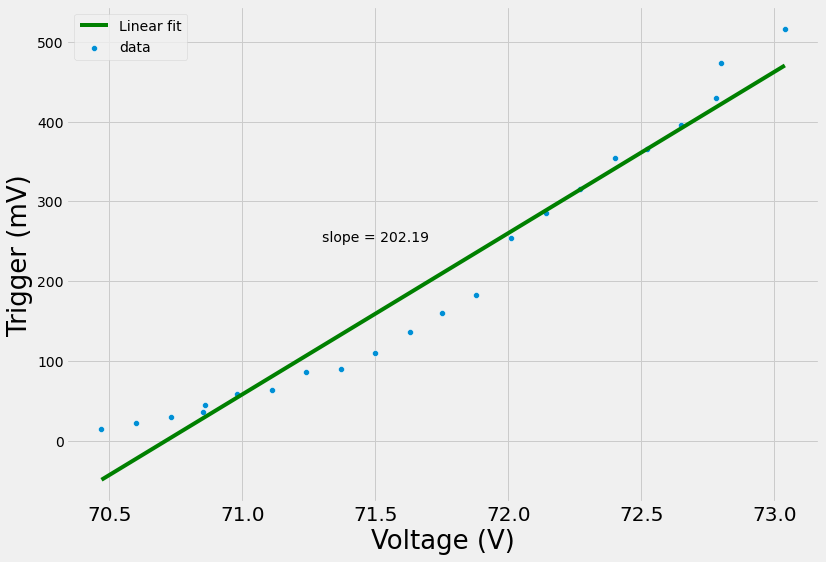

In [9]:
sns.lineplot(x=ganancia.voltage, y= lr.slope*ganancia.voltage + lr.intercept,
             color='g', label='Linear fit')
sns.scatterplot(x=ganancia.voltage, y= -1*ganancia.trigger, label='data')
plt.xlabel('Voltage (V)')
plt.ylabel('Trigger (mV)')
plt.text(71.3,250,f'slope = {round(lr.slope,2)}')
plt.legend();

In [ ]:
sns.lineplot(x = x, y = y).set(title='Lineal attenuation coefficient of cardboard')
m = y[1]-y[0]
plt.annotate(f'$m = {m} = \mu $',(1.25,5.58))
plt.annotate(f'$ln[I(x)] = \mu x - ln(I_0) $',(1.25,5.59))
plt.ylabel('$ln[I(x)]$')
plt.xlabel('Thickness $(m^{-3})$')

In [ ]:
sns.lineplot(x = x, y = y)
m = y[1]-y[0]
plt.annotate(f'$m = {m} $',(0.7,5.58))

In [25]:
q

-1.602176634e-19

In [22]:
q = -1* 1.602176634e-19
C = 35e-12
(C/q)*71*10e-6

-155101.50050035

<AxesSubplot:xlabel='voltage', ylabel='voltage'>

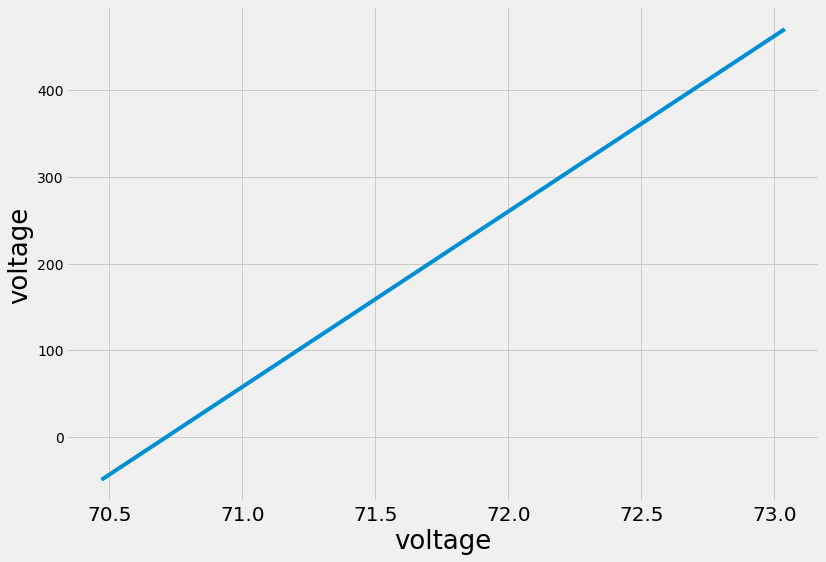

In [36]:
#LR = lambda x: lr.slope * x 
#+ np.log(y[0]) 
sns.lineplot(x=ganancia.voltage, y= lr.slope*ganancia.voltage + lr.intercept)

In [ ]:
#LR(np.array([1,2]))
y = np.log(h_max)
y

In [ ]:
LR(np.array([y])).squeeze()

In [35]:
lr

LinregressResult(slope=202.1852494218696, intercept=-14297.191171952412, rvalue=0.9775258246419507, pvalue=5.407740865697827e-15, stderr=9.750102810387464, intercept_stderr=699.2029616054463)

218452817606.12668